# MNIST digits classification with Keras

In [1]:
import numpy as np
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
%matplotlib inline
import keras

import sys
sys.path.append("../..")
import keras_utils

Using TensorFlow backend.


# Look at the data

50000 28x28 images of digits from 0 to 9.
We will train a classifier on this data.

In [1]:
from numpy import load

data = load('mnist.npz')
lst = data.files
lst

['x_test', 'x_train', 'y_train', 'y_test']

In [3]:
x_train = data['x_train']
x_test = data['x_test']
y_train = data['y_train']
y_test = data['y_test']

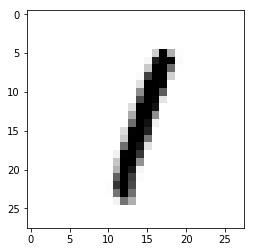

In [55]:
plt.imshow(x_test[5], cmap="Greys")
plt.show()

In [5]:
# flatten images
x_train_flat = x_train.reshape((x_train.shape[0], -1))
print(x_train_flat.shape)

x_test_flat = x_test.reshape((x_test.shape[0], -1))
print(x_test_flat.shape)

(60000, 784)


In [6]:
# one-hot encode the target
y_train_oh = keras.utils.to_categorical(y_train, 10)
y_test_oh = keras.utils.to_categorical(y_test, 10)

print(y_train_oh.shape)
print(y_test_oh[:3], y_train[:3])

(60000, 10)
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]] [5 0 4]


In [7]:
# building a model with keras
from keras.layers import Dense
from keras.models import Sequential

model = Sequential()  # it is a feed-forward network without loops like in RNN
model.add(Dense(512, input_shape=(784,), activation='relu'))  # the first layer must specify the input shape (replacing placeholders)
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(10, activation='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 575,050
Trainable params: 575,050
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [10]:
from keras.callbacks import ModelCheckpoint

filepath="weights-mnist-keras-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [11]:
model.fit(
    x_train_flat, 
    y_train_oh,
    batch_size=512, 
    epochs=50,
    validation_data=(x_test_flat, y_test_oh),
    callbacks=callbacks_list,
    verbose=0
)

Instructions for updating:
Use tf.cast instead.

Epoch 00001: val_acc improved from -inf to 0.89860, saving model to weights-mnist-keras-01-0.90.hdf5

Epoch 00002: val_acc improved from 0.89860 to 0.91830, saving model to weights-mnist-keras-02-0.92.hdf5

Epoch 00003: val_acc improved from 0.91830 to 0.92290, saving model to weights-mnist-keras-03-0.92.hdf5

Epoch 00004: val_acc did not improve from 0.92290

Epoch 00005: val_acc improved from 0.92290 to 0.92710, saving model to weights-mnist-keras-05-0.93.hdf5

Epoch 00006: val_acc improved from 0.92710 to 0.94270, saving model to weights-mnist-keras-06-0.94.hdf5

Epoch 00007: val_acc did not improve from 0.94270

Epoch 00008: val_acc did not improve from 0.94270

Epoch 00009: val_acc did not improve from 0.94270

Epoch 00010: val_acc did not improve from 0.94270

Epoch 00011: val_acc did not improve from 0.94270

Epoch 00012: val_acc did not improve from 0.94270

Epoch 00013: val_acc did not improve from 0.94270

Epoch 00014: val_acc 

In [34]:
model.evaluate(x_test_flat,y_test_oh)

10000/10000 [==============================] - 1s 69us/step


[0.1378810730330646, 0.9585]

In [58]:
np.argmax(model.predict(x_test_flat[5].reshape(1,784)))

1